<a href="https://colab.research.google.com/github/mpovolocky-a11y/ML_IT_Support_Classification/blob/step1-eda-data-loading/ML_IT_Support_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача: Многоклассовая классификация текстовых обращений.

Цель: Автоматизировать назначение «Рабочей группы» (12 категорий) на основе текста обращения («Описание»).

Входные данные: ~8000 строк в формате CSV/Excel.

Ожидаемый результат: Модель, которая с высокой точностью (F1-weighted > 0.8) распределяет заявки.





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Настроим графики, чтобы они были красивыми
sns.set(style="whitegrid")

In [ ]:
# Загрузка данных

# Загрузим файл
df = pd.read_excel('sample_data/ML_dataset.xlsx')

# Выведем первые 5 строк, чтобы убедиться, что всё считалось правильно
df.head()

,Описание,Рабочая группа
0,ag тема: оценка поощрения. оценка 1. название ...,РГ АГ.Маркет.Оценки
1,ag тема: оценка поощрения. оценка 1. название ...,РГ АГ.Маркет.Оценки
2,ag тема: оценка поощрения. оценка 1. название ...,РГ АГ.Маркет.Оценки
3,ag тема: оценка поощрения. оценка 1. название ...,РГ АГ.Маркет.Оценки
4,ag тема: оценка поощрения. оценка 1. название ...,РГ АГ.Маркет.Оценки


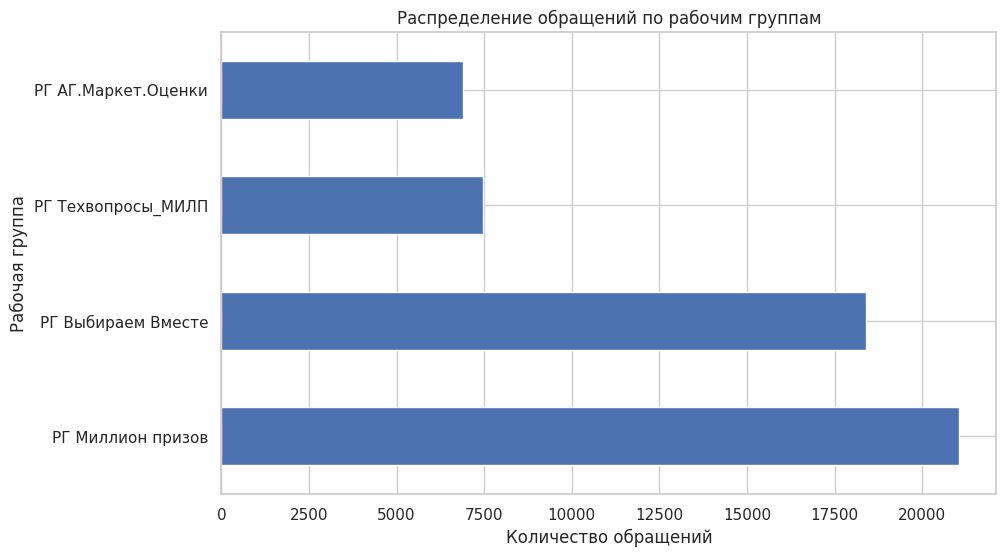

Рабочая группа
РГ Миллион призов      21063
РГ Выбираем Вместе     18399
РГ Техвопросы_МИЛП      7471
РГ АГ.Маркет.Оценки     6909
Name: count, dtype: int64


In [ ]:
# Проверка "Баланса классов"

plt.figure(figsize=(10,6))
df['Рабочая группа'].value_counts().plot(kind='barh')
plt.title('Распределение обращений по рабочим группам')
plt.xlabel('Количество обращений')
plt.ylabel('Рабочая группа')
plt.show()

# Выведем точные числа
print(df['Рабочая группа'].value_counts())

In [ ]:
# Проверим, есть ли пустые описания
print("Пустых описаний:", df['Описание'].isnull().sum())

# Удалим строки, где описание пустое (если они есть)
df = df.dropna(subset=['Описание'])

# Посмотрим на 10 случайных текстов, чтобы понять, какой "мусор" там есть
for text in df['Описание'].sample(10).values:
    print("-" * 30)
    print(text)

In [ ]:
# Предобработка и очистка данных

def clean_text(text):
    text = str(text).lower() # в нижний регистр
    text = re.sub(r'https?://\S+|www\.\S+', ' [url] ', text) # убираем ссылки
    text = re.sub(r'\b\d+\b', ' ', text) # убираем отдельно стоящие цифры (ID, даты)
    text = re.sub(r'[^\w\s]', ' ', text) # убираем пунктуацию
    text = re.sub(r'\s+', ' ', text).strip() # убираем лишние пробелы
    return text

# Применяем очистку (займет немного времени, так как данных много)
df['Описание_очищенное'] = df['Описание'].apply(clean_text)

# Посмотрим результат
df[['Описание', 'Описание_очищенное']].head()